<a href="https://colab.research.google.com/github/LavanyaSamineni123/DATA-ANALYTICS/blob/main/SCM_ANALYTICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install the required packages
!pip install pandas numpy matplotlib prophet scikit-learn

# Step 2: Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Import necessary libraries
import pandas as pd
from google.colab import files

# Step 1: Upload the dataset
print("Please upload your dataset.")
uploaded = files.upload()

# Step 2: Load the dataset into a DataFrame
try:
    # Get the file name from the uploaded dictionary
    file_name = list(uploaded.keys())[0]
    # Load the dataset (try multiple encodings if needed)
    df = pd.read_csv(file_name, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_name, encoding='latin1')

# Step 3: Display basic dataset information
print("\nDataset successfully loaded! Here are the first 5 rows:")
print(df.head())
print("\nDataset information:")
print(df.info())


Please upload your dataset.


Saving DataCoSupplyChainDataset.csv to DataCoSupplyChainDataset.csv

Dataset successfully loaded! Here are the first 5 rows:
       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...

DATA PREPROCESSING

1.   List item
2.   List item



In [ ]:
# Handle missing values (e.g., fill with forward fill)
df.fillna(method='ffill', inplace=True)

# Ensure no missing values remain
print(df.isnull().sum())

<ipython-input-4-2c5945289898>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        0
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      0
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [ ]:
# List of relevant columns
relevant_columns = [
    'Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
    'Benefit per order', 'Sales per customer', 'Delivery Status',
    'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country',
    'Customer Segment', 'Department Name', 'Market', 'Order City',
    'Order Country', 'order date (DateOrders)', 'Order Id',
    'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price',
    'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
    'Order Item Total', 'Order Profit Per Order', 'Order Region',
    'Order State', 'Order Status', 'Product Category Id', 'Product Name',
    'Product Price', 'shipping date (DateOrders)', 'Shipping Mode'
]

# Filter the dataset
df_filtered = df[relevant_columns]

# Print the column names
print("Columns in the filtered dataset:")
print(df_filtered.columns)

# Display the first few rows of the filtered dataset
print("\nFirst few rows of the filtered dataset:")
print(df_filtered.head())

Columns in the filtered dataset:
Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Segment', 'Department Name', 'Market',
       'Order City', 'Order Country', 'order date (DateOrders)', 'Order Id',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Category Id', 'Product Name', 'Product Price',
       'shipping date (DateOrders)', 'Shipping Mode'],
      dtype='object')

First few rows of the filtered dataset:
       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER           

FEATURE ENGINEERING

SHIPPING DELAY

In [ ]:
df_filtered.loc[:, 'Shipping Delay'] = df_filtered['Days for shipping (real)'] - df_filtered['Days for shipment (scheduled)']

<ipython-input-6-e095bff6353b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Shipping Delay'] = df_filtered['Days for shipping (real)'] - df_filtered['Days for shipment (scheduled)']


ORDER MONTH AND YEAR

Extract the month and year from the order date for time-based analysis.

In [ ]:
import pandas as pd

# Assuming df_filtered is your DataFrame and 'order date (DateOrders)' is the column with date information

# Convert 'order date (DateOrders)' to datetime
df_filtered['order date (DateOrders)'] = pd.to_datetime(df_filtered['order date (DateOrders)'])

# Extract month and year
df_filtered['Order Month'] = df_filtered['order date (DateOrders)'].dt.month
df_filtered['Order Year'] = df_filtered['order date (DateOrders)'].dt.year

# Display the DataFrame to verify the changes
print(df_filtered.head())

       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk   Category Name Customer City Customer Country  ...  \
0                   0  Sporting Goods        Caguas      Puerto Rico  ...   
1                   1  Sporting Goods   

<ipython-input-7-7db167a8fcee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['order date (DateOrders)'] = pd.to_datetime(df_filtered['order date (DateOrders)'])
<ipython-input-7-7db167a8fcee>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Order Month'] = df_filtered['order date (DateOrders)'].dt.month
<ipython-input-7-7db167a8fcee>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

Profit Margin

Calculate the profit margin for each order.

In [ ]:
import numpy as np
df_filtered.loc[:, 'Profit Margin'] = np.where(
    df_filtered['Sales'] != 0,
    df_filtered['Order Profit Per Order'] / df_filtered['Sales'],
    np.nan  # or 0, or any other placeholder
)
# Print the first few rows of the filtered dataset
print(df_filtered.head())

       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk   Category Name Customer City Customer Country  ...  \
0                   0  Sporting Goods        Caguas      Puerto Rico  ...   
1                   1  Sporting Goods   

<ipython-input-8-7092bc1e90cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Profit Margin'] = np.where(


Order Size Category

Categorize orders based on quantity.

In [ ]:
import numpy as np
import pandas as pd

# Ensure we are working with a copy of the DataFrame to avoid SettingWithCopyWarning
df_filtered = df_filtered.copy()

# Handle missing or invalid values in 'Order Item Quantity'
df_filtered.loc[:, 'Order Item Quantity'] = df_filtered['Order Item Quantity'].fillna(0).astype(int)  # Replace NaN with 0 and convert to int

# Create the 'Order Size Category' column using pd.cut()
df_filtered.loc[:, 'Order Size Category'] = pd.cut(
    df_filtered['Order Item Quantity'],
    bins=[0, 5, 10, 20, np.inf],
    labels=['Small', 'Medium', 'Large', 'Very Large']
)

# Display the updated dataframe
print(df_filtered[['Order Item Quantity', 'Order Size Category']].head())

   Order Item Quantity Order Size Category
0                    1               Small
1                    1               Small
2                    1               Small
3                    1               Small
4                    1               Small


Region-Market Combination

Combine Order Region and Market for regional analysis.

In [ ]:
df_filtered.loc[:,'Region-Market'] = df_filtered['Order Region'] + ' - ' + df_filtered['Market']

Save the Processed Dataset to Excel

Save the filtered and engineered dataset to a new Excel file.

In [ ]:
# Save to Excel
df_filtered.to_excel('Processed_SupplyChainDataset.xlsx', index=False)

# Download the file to your local machine
from google.colab import files
files.download('Processed_SupplyChainDataset.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Verification of the new dataset


In [ ]:
# Display the first few rows of the processed dataset
print(df_filtered.head())

# Display column names
print(df_filtered.columns)

       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk   Category Name Customer City Customer Country  ...  \
0                   0  Sporting Goods        Caguas      Puerto Rico  ...   
1                   1  Sporting Goods   

Cleaning unnecessary rows in the dataset and extracting a new dataset by --

Removing rows with null values.

Removing rows with negative values in relevant numeric columns.

Removing rows with inconsistent or ambiguous data (e.g., invalid categories, outliers, or incorrect formats).

Retain only the rows that are relevant for analyses.

In [ ]:
!pip install pandas openpyxl
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset
df = pd.read_excel('Processed_SupplyChainDataset.xlsx')  # Replace with your file name

# Display the first few rows
print(df.head())

       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk   Category Name Customer City Customer Country  ...  \
0                   0  Sporting Goods        Caguas      Puerto Rico  ...   
1                   1  Sporting Goods   

In [ ]:
# List of essential columns for your analyses
essential_columns = [
    'Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
    'Benefit per order', 'Sales per customer', 'Delivery Status',
    'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country',
    'Customer Segment', 'Department Name', 'Market', 'Order City',
    'Order Country', 'order date (DateOrders)', 'Order Id',
    'Order Item Discount', 'Order Item Discount Rate', 'Order Item Product Price',
    'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
    'Order Item Total', 'Order Profit Per Order', 'Order Region',
    'Order State', 'Order Status', 'Product Category Id', 'Product Name',
    'Product Price', 'shipping date (DateOrders)', 'Shipping Mode',
    'Shipping Delay', 'Order Month', 'Order Year', 'Profit Margin',
    'Order Size Category', 'Region-Market'
]

# Drop rows with null values in essential columns
df_cleaned = df.dropna(subset=essential_columns)

# Display the cleaned dataset
print(df_cleaned.head())

       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk   Category Name Customer City Customer Country  ...  \
0                   0  Sporting Goods        Caguas      Puerto Rico  ...   
1                   1  Sporting Goods   

In [ ]:
# List of numeric columns to check for negative values
numeric_columns = [
    'Days for shipping (real)', 'Days for shipment (scheduled)',
    'Benefit per order', 'Sales per customer', 'Order Item Discount',
    'Order Item Discount Rate', 'Order Item Product Price',
    'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
    'Order Item Total', 'Order Profit Per Order', 'Product Price',
    'Shipping Delay', 'Profit Margin'
]

# Remove rows with negative values in numeric columns
df_cleaned = df_cleaned[(df_cleaned[numeric_columns] >= 0).all(axis=1)]

# Display the cleaned dataset
print(df_cleaned.head())

       Type  Days for shipping (real)  Days for shipment (scheduled)  \
5  TRANSFER                         6                              4   
6     DEBIT                         2                              1   
7  TRANSFER                         2                              1   
8      CASH                         3                              2   
9      CASH                         2                              1   

   Benefit per order  Sales per customer    Delivery Status  \
5          18.580000          294.980011  Shipping canceled   
6          95.180000          288.420013      Late delivery   
7          68.430000          285.140015      Late delivery   
8         133.720001          278.589996      Late delivery   
9         132.149994          275.309998      Late delivery   

   Late_delivery_risk   Category Name Customer City Customer Country  ...  \
5                   0  Sporting Goods     Tonawanda          EE. UU.  ...   
6                   1  Sporting Go

In [ ]:
# List of valid delivery statuses
valid_delivery_statuses = ['Late delivery', 'Advance shipping', 'Shipping on time', 'Shipping canceled']

# Remove rows with invalid delivery statuses
df_cleaned = df_cleaned[df_cleaned['Delivery Status'].isin(valid_delivery_statuses)]

In [ ]:
# Define a reasonable range for order item quantity
min_quantity = 1
max_quantity = 100

# Remove rows with outliers in order item quantity
df_cleaned = df_cleaned[
    (df_cleaned['Order Item Quantity'] >= min_quantity) &
    (df_cleaned['Order Item Quantity'] <= max_quantity)
]

In [ ]:
# Ensure 'order date (DateOrders)' and 'shipping date (DateOrders)' are valid dates
df_cleaned = df_cleaned[
    (df_cleaned['order date (DateOrders)'].notnull()) &
    (df_cleaned['shipping date (DateOrders)'].notnull())
]

In [ ]:
# Save to Excel
df_cleaned.to_excel('Cleaned_SupplyChainDataset.xlsx', index=False)

# Download the file to your local machine
from google.colab import files
files.download('Cleaned_SupplyChainDataset.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of numeric columns to remove outliers from
numeric_columns = [
    'Order Item Quantity', 'Sales', 'Profit Margin', 'Order Item Total',
    'Order Profit Per Order', 'Product Price', 'Shipping Delay'
]

# Remove outliers for each numeric column
for column in numeric_columns:
    df_cleaned = remove_outliers_iqr(df_cleaned, column)

# Display the cleaned dataset
print(df_cleaned.head())

       Type  Days for shipping (real)  Days for shipment (scheduled)  \
5  TRANSFER                         6                              4   
6     DEBIT                         2                              1   
7  TRANSFER                         2                              1   
8      CASH                         3                              2   
9      CASH                         2                              1   

   Benefit per order  Sales per customer    Delivery Status  \
5          18.580000          294.980011  Shipping canceled   
6          95.180000          288.420013      Late delivery   
7          68.430000          285.140015      Late delivery   
8         133.720001          278.589996      Late delivery   
9         132.149994          275.309998      Late delivery   

   Late_delivery_risk   Category Name Customer City Customer Country  ...  \
5                   0  Sporting Goods     Tonawanda          EE. UU.  ...   
6                   1  Sporting Go

In [ ]:
# Remove rare categories in 'Customer Segment'
customer_segment_counts = df_cleaned['Customer Segment'].value_counts()
valid_segments = customer_segment_counts[customer_segment_counts > 100].index  # Keep segments with at least 100 occurrences
df_cleaned = df_cleaned[df_cleaned['Customer Segment'].isin(valid_segments)]

# Remove rare categories in 'Shipping Mode'
shipping_mode_counts = df_cleaned['Shipping Mode'].value_counts()
valid_shipping_modes = shipping_mode_counts[shipping_mode_counts > 100].index  # Keep shipping modes with at least 100 occurrences
df_cleaned = df_cleaned[df_cleaned['Shipping Mode'].isin(valid_shipping_modes)]

In [ ]:
# Retain rows with valid customer location, product category, and customer segmentation
df_cleaned = df_cleaned[
    df_cleaned['Customer City'].notnull() &
    df_cleaned['Customer Country'].notnull() &
    df_cleaned['Category Name'].notnull() &
    df_cleaned['Product Name'].notnull() &
    df_cleaned['Customer Segment'].notnull()
]

In [ ]:
# Retain rows with valid order sizes, shipping modes, and locations
df_cleaned = df_cleaned[
    df_cleaned['Order Size Category'].notnull() &
    df_cleaned['Shipping Mode'].notnull() &
    df_cleaned['Order Region'].notnull() &
    df_cleaned['Order Country'].notnull()
]

In [ ]:
# Save to Excel
df_cleaned.to_excel('Final_Cleaned_SupplyChainDataset.xlsx', index=False)

# Download the file to your local machine
from google.colab import files
files.download('Final_Cleaned_SupplyChainDataset.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install pandas matplotlib seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the final cleaned dataset
df = pd.read_excel('Final_Cleaned_SupplyChainDataset.xlsx')  # Replace with your file name

# Display the first few rows
print(df.head())

       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0  TRANSFER                         6                              4   
1     DEBIT                         2                              1   
2  TRANSFER                         2                              1   
3      CASH                         3                              2   
4      CASH                         2                              1   

   Benefit per order  Sales per customer    Delivery Status  \
0          18.580000          294.980011  Shipping canceled   
1          95.180000          288.420013      Late delivery   
2          68.430000          285.140015      Late delivery   
3         133.720001          278.589996      Late delivery   
4         132.149994          275.309998      Late delivery   

   Late_delivery_risk   Category Name Customer City Customer Country  ...  \
0                   0  Sporting Goods     Tonawanda          EE. UU.  ...   
1                   1  Sporting Go

 Visualizations for Hypothesis H1

 Product Demand by Customer Location

<ipython-input-29-3e36a8fa13db>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer Country', y='Order Item Quantity', data=demand_by_location, palette='viridis')


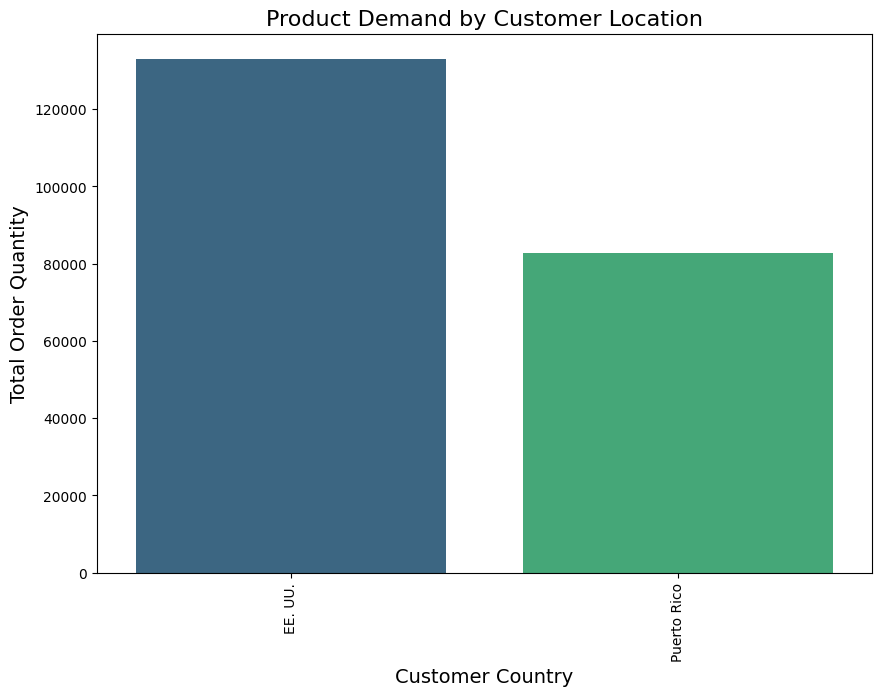

In [ ]:
# Aggregate demand by customer location
demand_by_location = df.groupby('Customer Country')['Order Item Quantity'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 7))
sns.barplot(x='Customer Country', y='Order Item Quantity', data=demand_by_location, palette='viridis')
plt.title('Product Demand by Customer Location', fontsize=16)
plt.xlabel('Customer Country', fontsize=14)
plt.ylabel('Total Order Quantity', fontsize=14)
plt.xticks(rotation=90)
plt.show()

Product Demand by Product Category

<ipython-input-30-e9bcecdbc0d0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category Name', y='Order Item Quantity', data=demand_by_category, palette='magma')


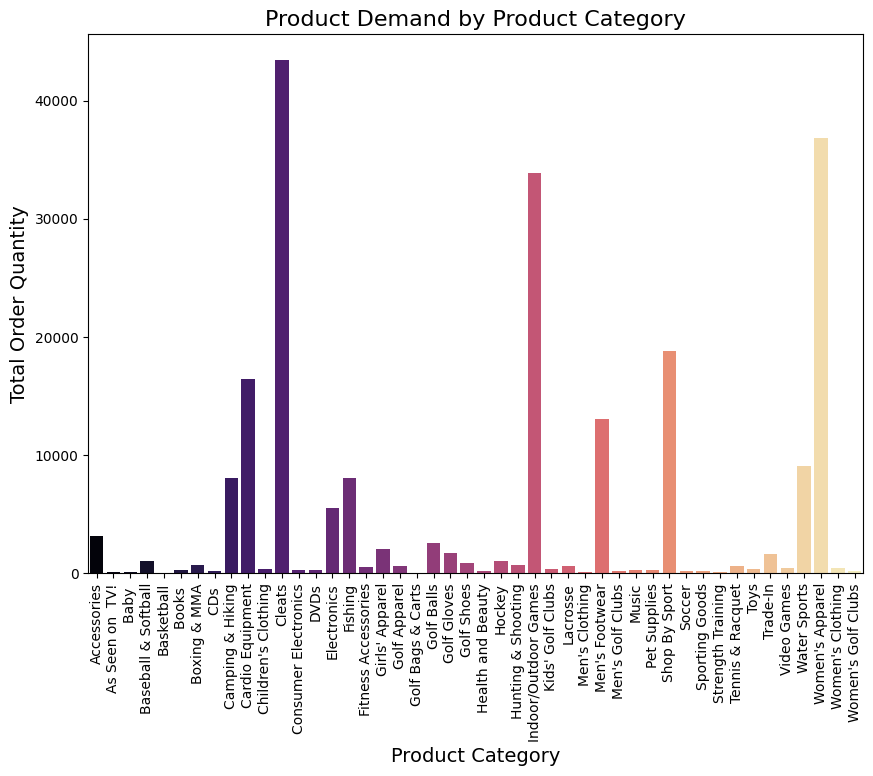

In [ ]:
# Aggregate demand by product category
demand_by_category = df.groupby('Category Name')['Order Item Quantity'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 7))
sns.barplot(x='Category Name', y='Order Item Quantity', data=demand_by_category, palette='magma')
plt.title('Product Demand by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Total Order Quantity', fontsize=14)
plt.xticks(rotation=90)
plt.show()

Visualizations for Hypothesis H2

Inventory Stock Levels by Order Size

<ipython-input-31-d64c5a324fe3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Size Category', y='Order Item Quantity', data=inventory_by_order_size, palette='coolwarm')


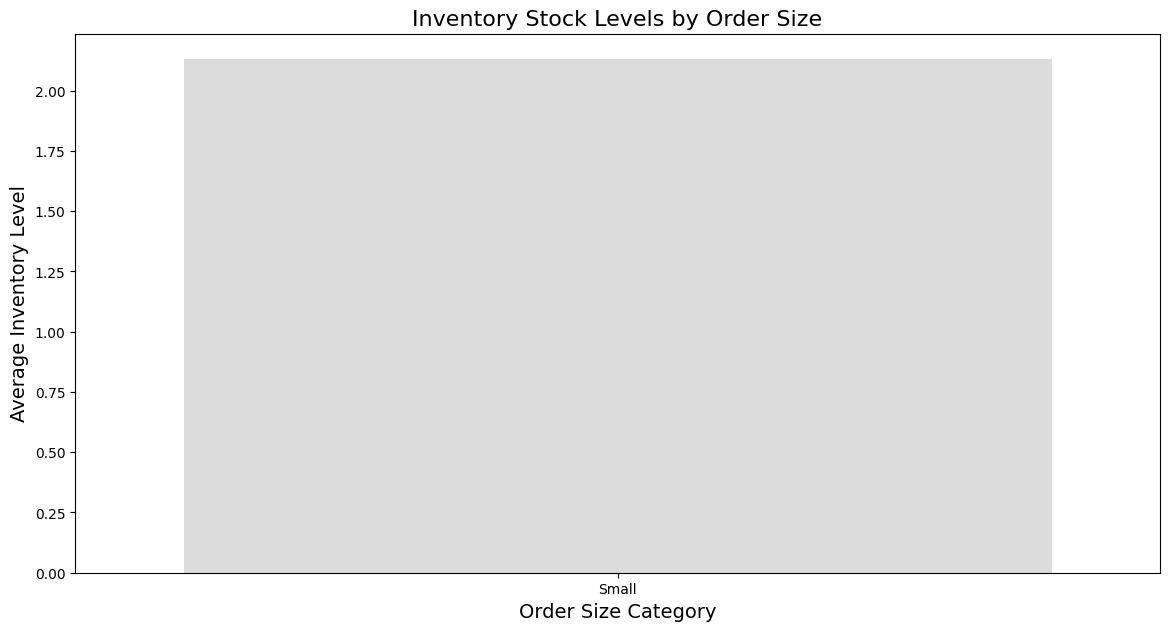

In [ ]:
# Aggregate inventory stock levels by order size category
inventory_by_order_size = df.groupby('Order Size Category')['Order Item Quantity'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(x='Order Size Category', y='Order Item Quantity', data=inventory_by_order_size, palette='coolwarm')
plt.title('Inventory Stock Levels by Order Size', fontsize=16)
plt.xlabel('Order Size Category', fontsize=14)
plt.ylabel('Average Inventory Level', fontsize=14)
plt.show()

Shipping Modes by Order Size

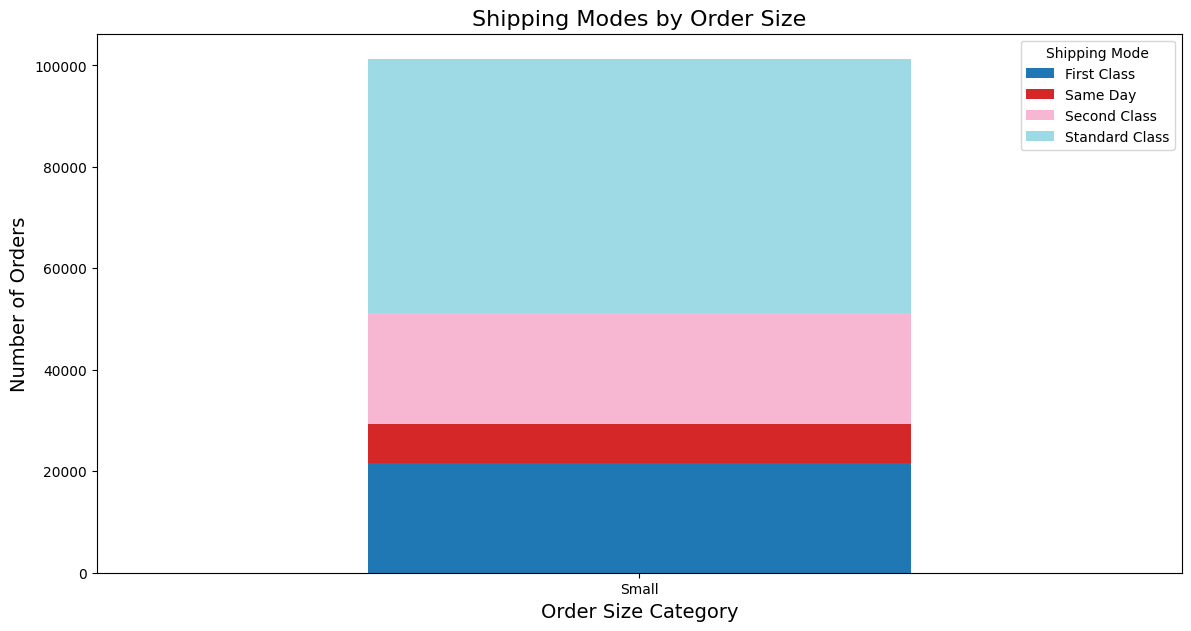

In [ ]:
# Aggregate shipping modes by order size category
shipping_by_order_size = df.groupby(['Order Size Category', 'Shipping Mode']).size().unstack()

# Plot
shipping_by_order_size.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Shipping Modes by Order Size', fontsize=16)
plt.xlabel('Order Size Category', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Shipping Mode')
plt.show()

Late Deliveries by Region

<ipython-input-33-53d1e9fa6af0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Region', y='Late Deliveries', data=late_deliveries_by_region, palette='rocket')


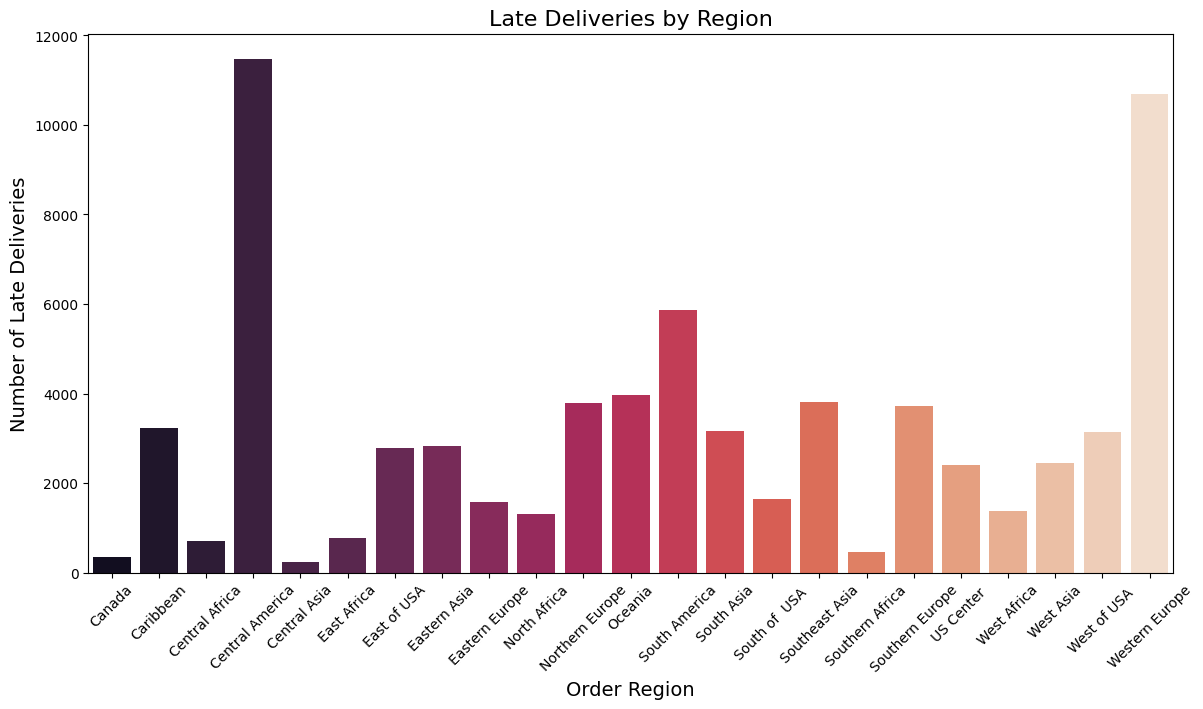

In [ ]:
# Aggregate late deliveries by region
late_deliveries_by_region = df[df['Late_delivery_risk'] == 1].groupby('Order Region').size().reset_index(name='Late Deliveries')

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(x='Order Region', y='Late Deliveries', data=late_deliveries_by_region, palette='rocket')
plt.title('Late Deliveries by Region', fontsize=16)
plt.xlabel('Order Region', fontsize=14)
plt.ylabel('Number of Late Deliveries', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Profitability vs. Shipping Delays

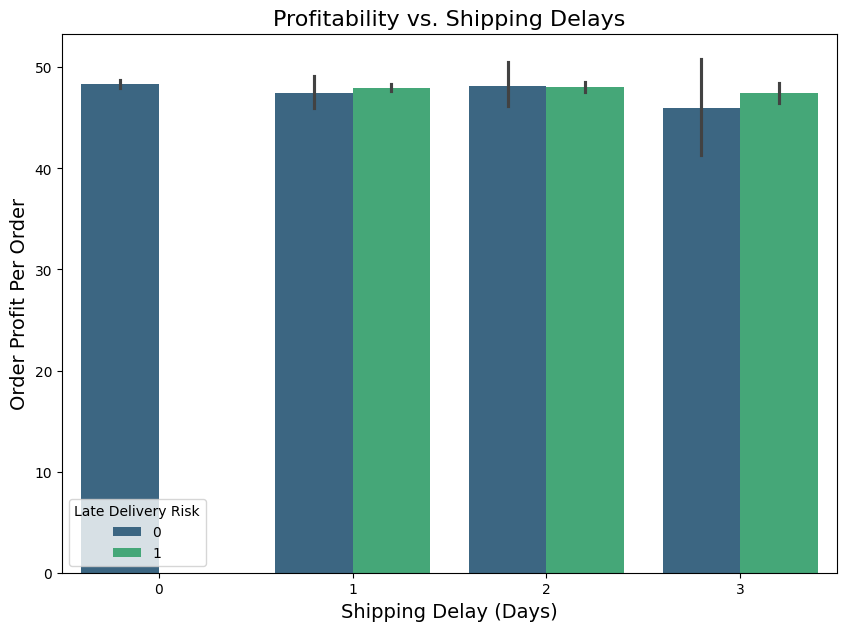

In [ ]:
# Scatter plot of profitability vs. shipping delays
plt.figure(figsize=(10, 7))
sns.barplot(x='Shipping Delay', y='Order Profit Per Order', data=df, hue='Late_delivery_risk', palette='viridis')
plt.title('Profitability vs. Shipping Delays', fontsize=16)
plt.xlabel('Shipping Delay (Days)', fontsize=14)
plt.ylabel('Order Profit Per Order', fontsize=14)
plt.legend(title='Late Delivery Risk')
plt.show()

Preparing data for prophet ALgo

In [ ]:
import pandas as pd

# Load the final cleaned dataset
df = pd.read_excel('Final_Cleaned_SupplyChainDataset.xlsx')  # Replace with your file name

# 1. Prepare data for product demand by customer location
demand_by_location = df.groupby(['order date (DateOrders)', 'Customer Country'])['Order Item Quantity'].sum().reset_index()
demand_by_location = demand_by_location.rename(columns={'order date (DateOrders)': 'ds', 'Order Item Quantity': 'y'})

# 2. Prepare data for product demand by product category
demand_by_category = df.groupby(['order date (DateOrders)', 'Category Name'])['Order Item Quantity'].sum().reset_index()
demand_by_category = demand_by_category.rename(columns={'order date (DateOrders)': 'ds', 'Order Item Quantity': 'y'})

# Save the prepared datasets
demand_by_location.to_csv('demand_by_location.csv', index=False)
demand_by_category.to_csv('demand_by_category.csv', index=False)

print("Data preparation for Prophet completed!")

Data preparation for Prophet completed!


Save the Visualizations (Optional)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpuxrlyu0z/wfzgfgbv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuxrlyu0z/yahp172h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58985', 'data', 'file=/tmp/tmpuxrlyu0z/wfzgfgbv.json', 'init=/tmp/tmpuxrlyu0z/yahp172h.json', 'output', 'file=/tmp/tmpuxrlyu0z/prophet_model4nse6aw4/prophet_model-20250312212021.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:20:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:20:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


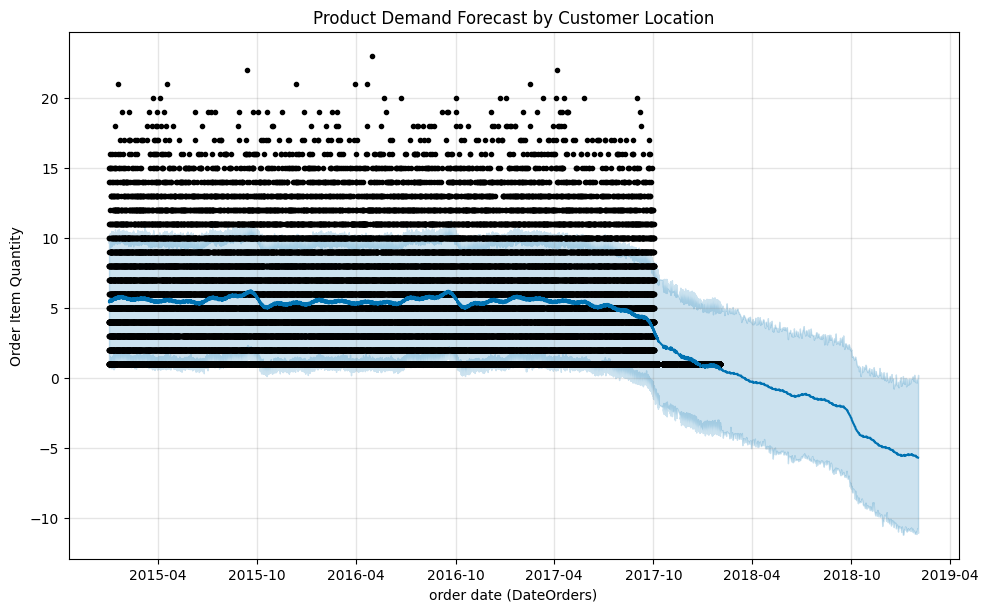

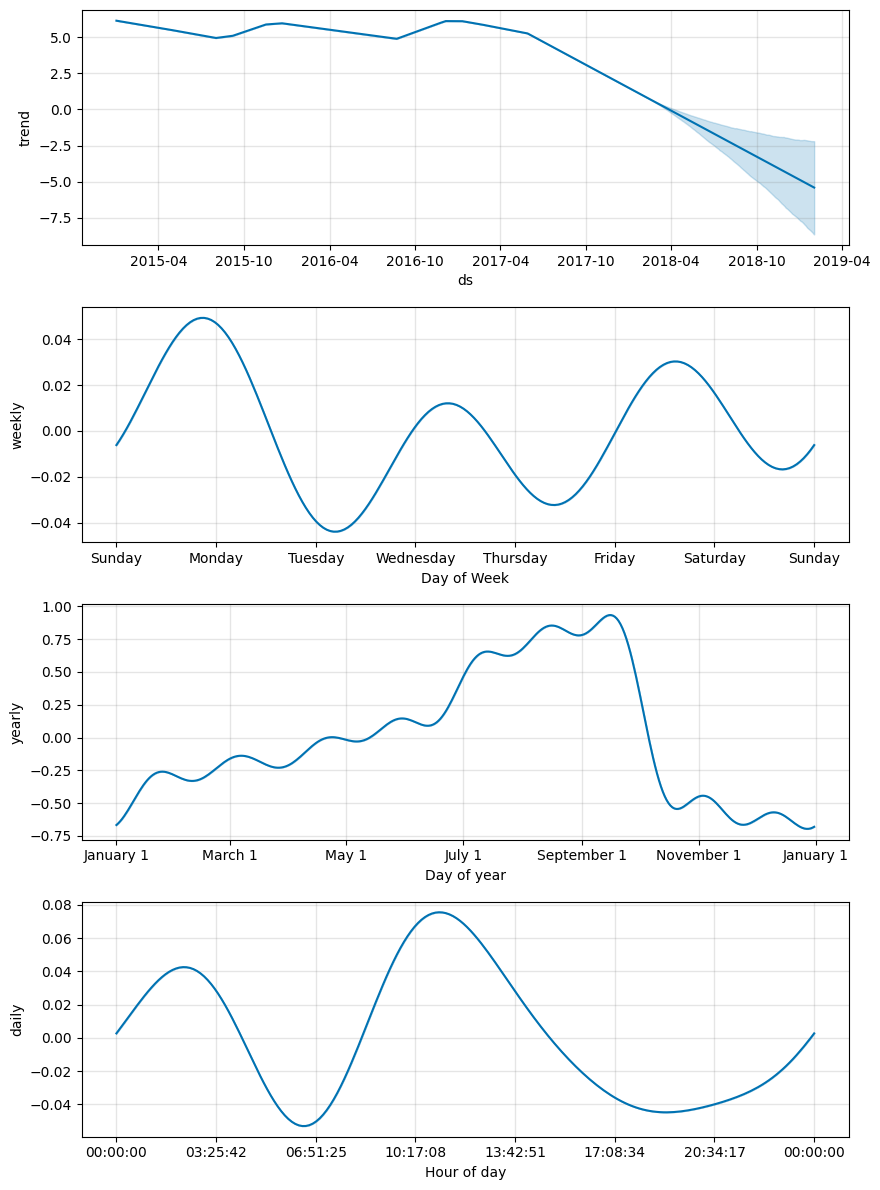

DEBUG:cmdstanpy:input tempfile: /tmp/tmpuxrlyu0z/5bl1bvlo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuxrlyu0z/u66n99t_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26142', 'data', 'file=/tmp/tmpuxrlyu0z/5bl1bvlo.json', 'init=/tmp/tmpuxrlyu0z/u66n99t_.json', 'output', 'file=/tmp/tmpuxrlyu0z/prophet_modell95823wh/prophet_model-20250312212102.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:21:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:22:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


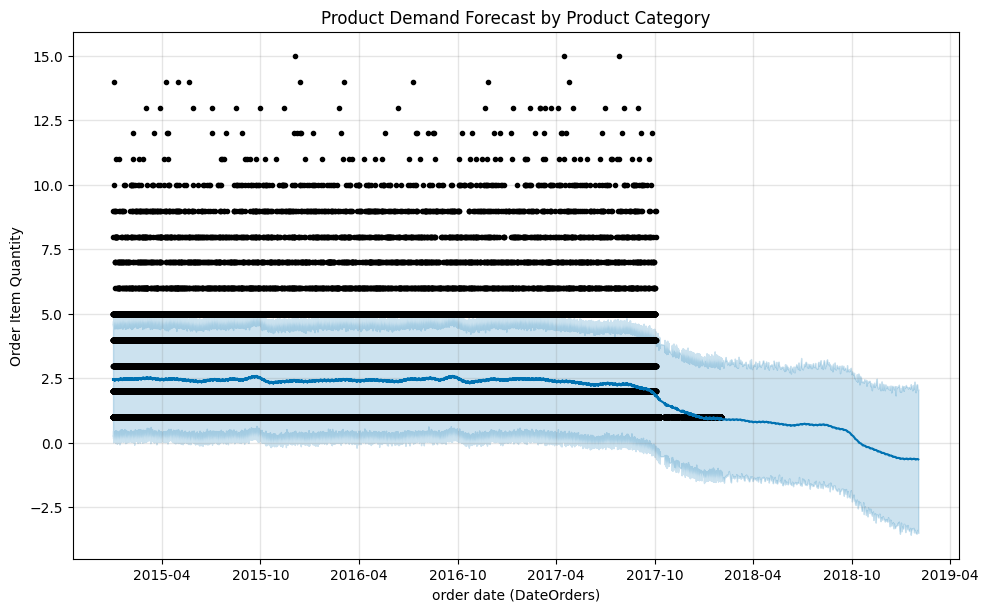

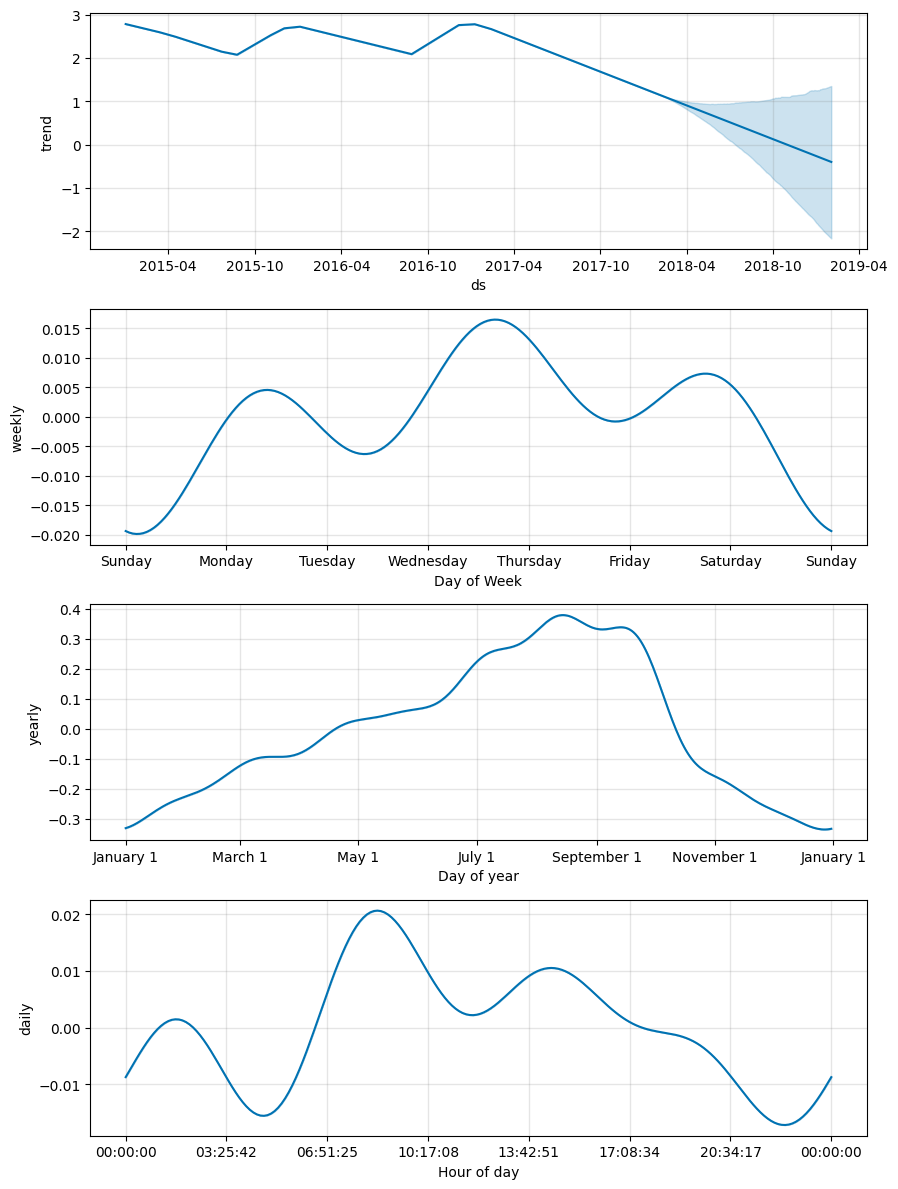

In [ ]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Function to train Prophet model and plot forecasts
def train_prophet_and_forecast(data, title, ylabel):
    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(data)

    # Create future dataframe for forecasting
    future = model.make_future_dataframe(periods=365)  # Forecast for 1 year
    forecast = model.predict(future)

    # Plot the forecast
    fig = model.plot(forecast)
    plt.title(title)
    plt.xlabel('order date (DateOrders)')
    plt.ylabel(ylabel)
    plt.show()

    # Plot forecast components
    fig2 = model.plot_components(forecast)
    plt.show()

# Train and forecast for product demand by customer location
train_prophet_and_forecast(demand_by_location, 'Product Demand Forecast by Customer Location', 'Order Item Quantity')

# Train and forecast for product demand by product category
train_prophet_and_forecast(demand_by_category, 'Product Demand Forecast by Product Category', 'Order Item Quantity')

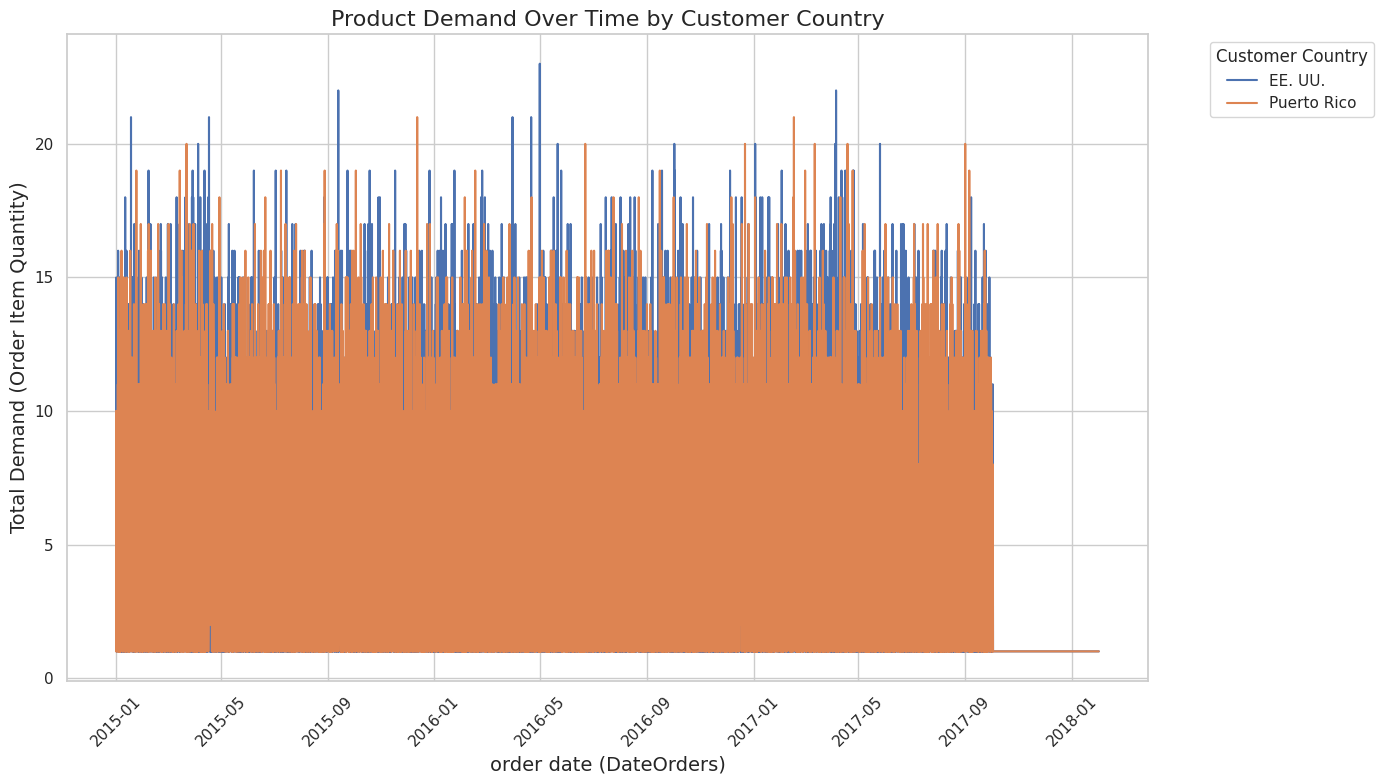

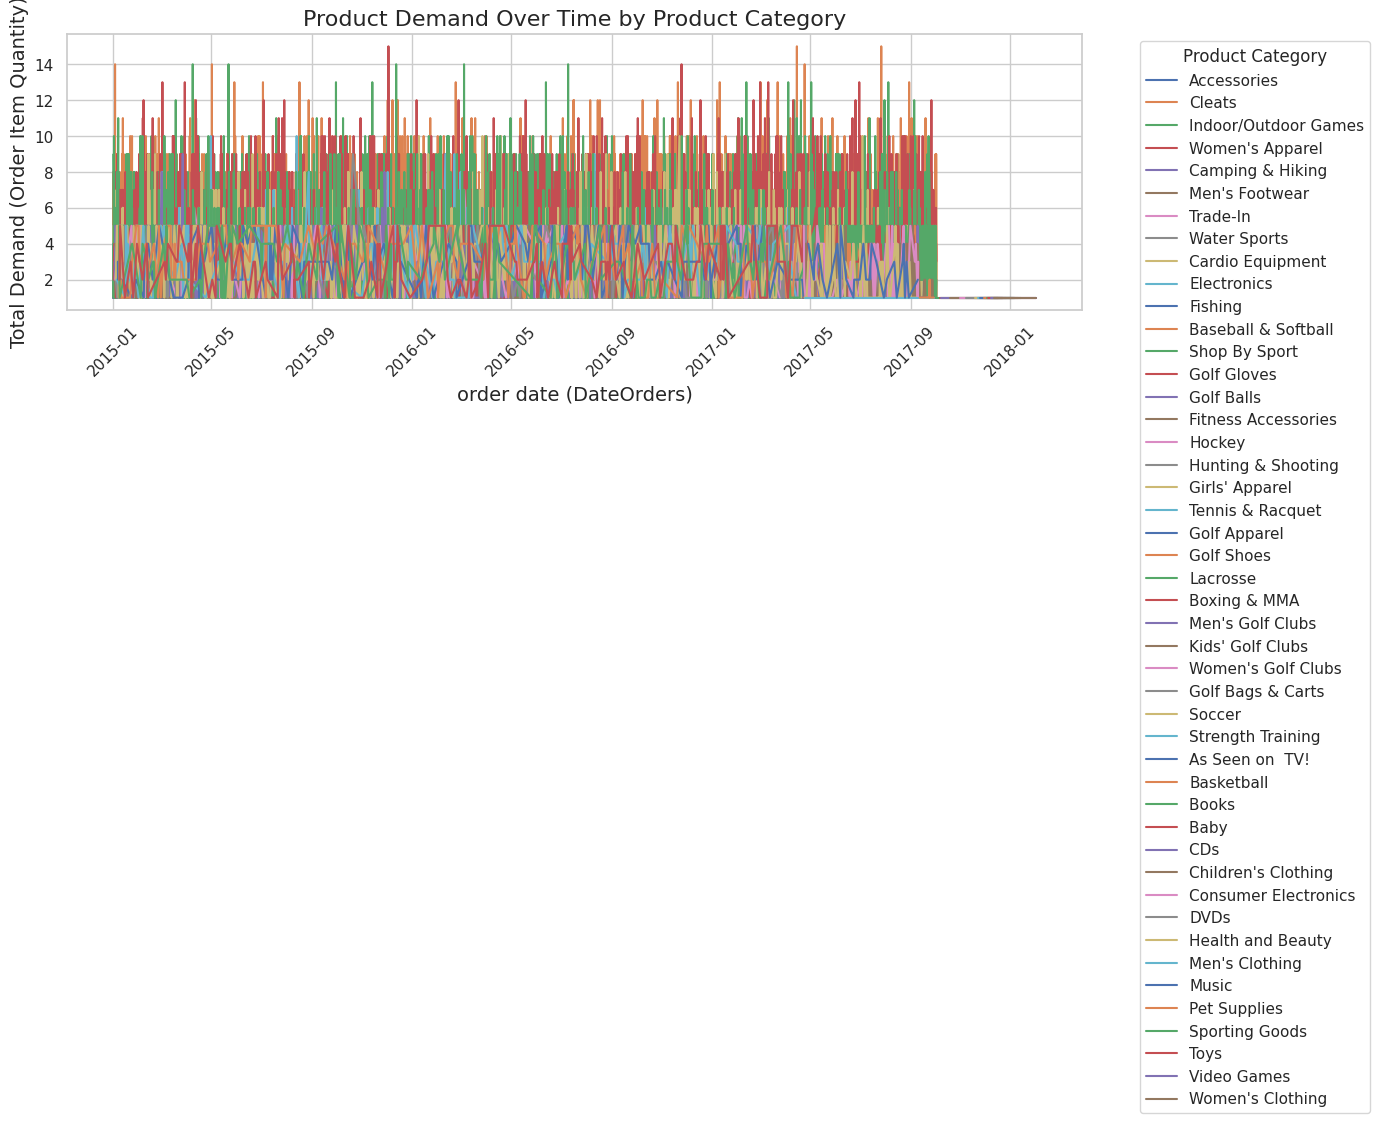

Visualizations created!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the prepared data (if not already loaded)
demand_by_location = pd.read_csv('demand_by_location.csv')
demand_by_category = pd.read_csv('demand_by_category.csv')

# Convert 'ds' column to datetime for proper plotting
demand_by_location['ds'] = pd.to_datetime(demand_by_location['ds'])
demand_by_category['ds'] = pd.to_datetime(demand_by_category['ds'])

# Set the style for plots
sns.set(style="whitegrid")

# 1. Time Series Plot for Demand by Location
plt.figure(figsize=(14, 8))
for country in demand_by_location['Customer Country'].unique():
    country_data = demand_by_location[demand_by_location['Customer Country'] == country]
    plt.plot(country_data['ds'], country_data['y'], label=country)

plt.title('Product Demand Over Time by Customer Country', fontsize=16)
plt.xlabel('order date (DateOrders)', fontsize=14)
plt.ylabel('Total Demand (Order Item Quantity)', fontsize=14)
plt.legend(title='Customer Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Time Series Plot for Demand by Category
plt.figure(figsize=(14, 8))
for category in demand_by_category['Category Name'].unique():
    category_data = demand_by_category[demand_by_category['Category Name'] == category]
    plt.plot(category_data['ds'], category_data['y'], label=category)

plt.title('Product Demand Over Time by Product Category', fontsize=16)
plt.xlabel('order date (DateOrders)', fontsize=14)
plt.ylabel('Total Demand (Order Item Quantity)', fontsize=14)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Visualizations created!")

:H1: Product demand by customer location or region and by product category

customer satisfaction by customer segment

In [ ]:
pip install pandas prophet matplotlib

In [ ]:
# Import necessary libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload the dataset
uploaded = files.upload()

# Step 2: Get the file name
file_name = list(uploaded.keys())[0]  # Assumes only one file is uploaded

# Step 3: Load the dataset
# Use pd.read_excel() for Excel files or pd.read_csv() for CSV files
if file_name.endswith('.xlsx'):
    df = pd.read_excel(file_name)
elif file_name.endswith('.csv'):
    df = pd.read_csv(file_name)
else:
    raise ValueError("Unsupported file format. Please upload a CSV or Excel file.")


# Step 5: Aggregate data by 'Order Region', 'Category Name', and 'order date (DateOrders)'
df_agg = df.groupby(['Order Region', 'Category Name', 'order date (DateOrders)']).agg({
    'Order Item Quantity': 'sum'  # Sum of product quantities for demand prediction
}).reset_index()

# Step 6: Rename columns for Prophet
df_agg.rename(columns={'order date (DateOrders)': 'ds', 'Order Item Quantity': 'y'}, inplace=True)

# Step 7: Initialize Prophet model
model = Prophet()

# Step 8: Fit the model
model.fit(df_agg)

# Step 9: Create a future dataframe for prediction (e.g., next 365 days)
future = model.make_future_dataframe(periods=30)

# Step 10: Predict
forecast = model.predict(future)

# Step 13: Summary of the forecast
print("Forecast Summary:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Saving Final_Cleaned_SupplyChainDataset.xlsx to Final_Cleaned_SupplyChainDataset.xlsx


DEBUG:cmdstanpy:input tempfile: /tmp/tmppjqlh8qy/f0fovtrt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjqlh8qy/q_v1hu5_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65165', 'data', 'file=/tmp/tmppjqlh8qy/f0fovtrt.json', 'init=/tmp/tmppjqlh8qy/q_v1hu5_.json', 'output', 'file=/tmp/tmppjqlh8qy/prophet_model7m0lu9ba/prophet_model-20250314033342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:33:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:34:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast Summary:
                       ds      yhat  yhat_lower  yhat_upper
42506 2018-02-26 23:38:00  0.902948   -1.262204    3.018608
42507 2018-02-27 23:38:00  0.909514   -1.219086    3.162304
42508 2018-02-28 23:38:00  0.918758   -1.260751    3.028978
42509 2018-03-01 23:38:00  0.904538   -1.342749    3.322702
42510 2018-03-02 23:38:00  0.910001   -1.332201    3.025086


In [ ]:
# Import necessary libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload the dataset
uploaded = files.upload()

# Step 2: Get the file name
file_name = list(uploaded.keys())[0]  # Assumes only one file is uploaded

# Step 3: Load the dataset
# Use pd.read_excel() for Excel files or pd.read_csv() for CSV files
if file_name.endswith('.xlsx'):
    df = pd.read_excel(file_name)
elif file_name.endswith('.csv'):
    df = pd.read_csv(file_name)
else:
    raise ValueError("Unsupported file format. Please upload a CSV or Excel file.")


# Step 5: Aggregate data by 'Order Region', 'Category Name', and 'order date (DateOrders)'
df_agg = df.groupby(['Order Region', 'Category Name', 'order date (DateOrders)']).agg({
    'Order Item Quantity': 'sum'  # Sum of product quantities for demand prediction
}).reset_index()

# Step 6: Rename columns for Prophet
df_agg.rename(columns={'order date (DateOrders)': 'ds', 'Order Item Quantity': 'y'}, inplace=True)

# Step 7: Initialize Prophet model
model = Prophet()

# Step 8: Fit the model
model.fit(df_agg)

# Step 9: Create a future dataframe for prediction (e.g., next 365 days)
future = model.make_future_dataframe(periods=15)

# Step 10: Predict
forecast = model.predict(future)

# Step 13: Summary of the forecast
print("Forecast Summary:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Saving Final_Cleaned_SupplyChainDataset.xlsx to Final_Cleaned_SupplyChainDataset (1).xlsx


DEBUG:cmdstanpy:input tempfile: /tmp/tmpyfxmc53b/56ahtry7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyfxmc53b/l0wjlc40.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81534', 'data', 'file=/tmp/tmpyfxmc53b/56ahtry7.json', 'init=/tmp/tmpyfxmc53b/l0wjlc40.json', 'output', 'file=/tmp/tmpyfxmc53b/prophet_model_xt5bs2y/prophet_model-20250313235235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:52:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:53:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast Summary:
                       ds      yhat  yhat_lower  yhat_upper
42491 2018-02-11 23:38:00  0.904376   -1.338917    3.195719
42492 2018-02-12 23:38:00  0.901900   -1.299399    3.180552
42493 2018-02-13 23:38:00  0.907918   -1.363198    3.133376
42494 2018-02-14 23:38:00  0.916947   -1.191955    3.207403
42495 2018-02-15 23:38:00  0.902865   -1.334060    3.074425


Forecast Inventory Levels (for H2)



Inventory levels can be forecasted based on historical order quantities and trends.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpyfxmc53b/9ckpy51q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyfxmc53b/ar2y51gr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85116', 'data', 'file=/tmp/tmpyfxmc53b/9ckpy51q.json', 'init=/tmp/tmpyfxmc53b/ar2y51gr.json', 'output', 'file=/tmp/tmpyfxmc53b/prophet_model33xur7r_/prophet_model-20250313225124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:51:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:51:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


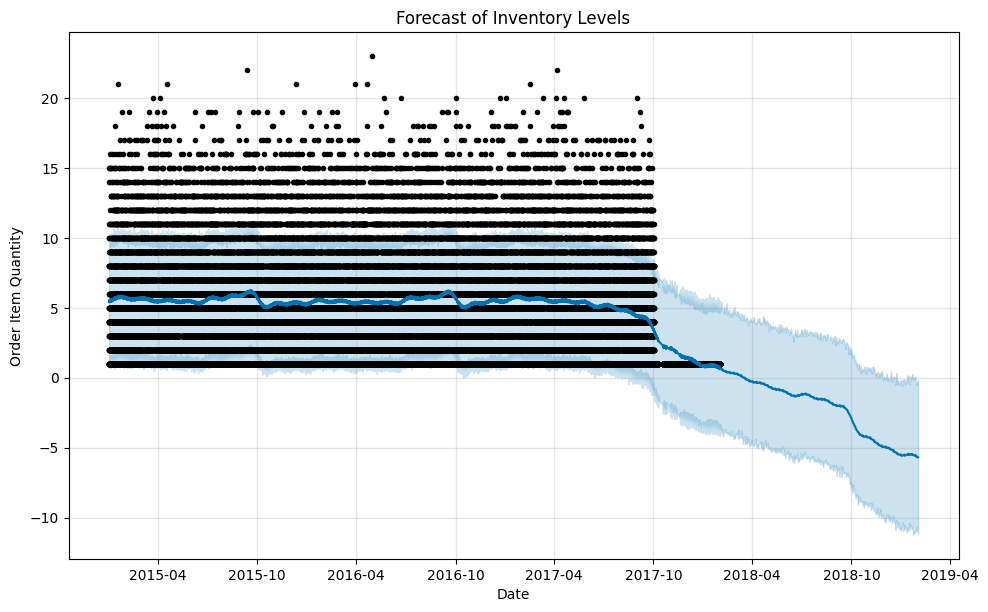

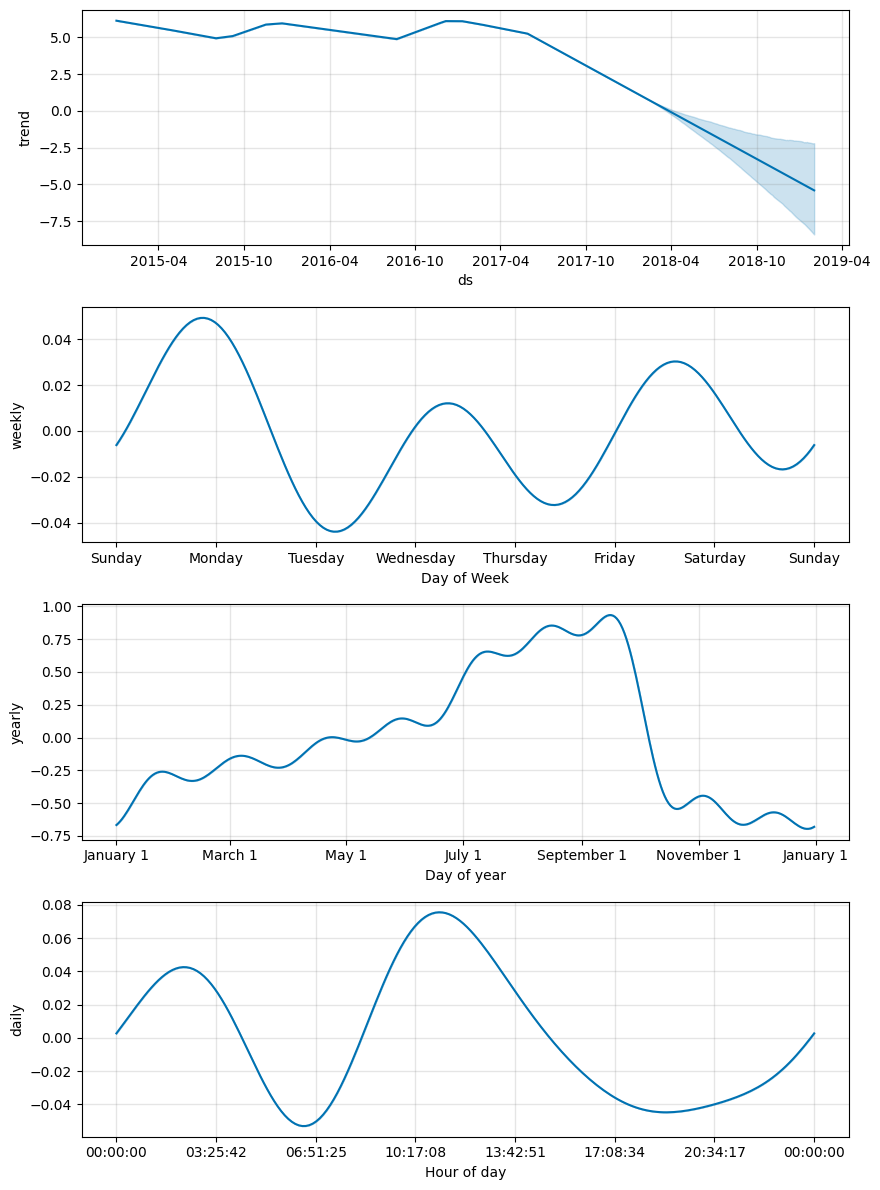

'\nThe forecasted inventory levels show the expected demand for products over time. \nThis helps in optimizing stock levels to avoid overstocking or stockouts. \nThe trend and seasonality components provide insights into how demand varies over time, enabling better inventory management.\n'

In [ ]:
# Aggregate data by date to get total order quantities
inventory_data = df.groupby('order date (DateOrders)').agg({
    'Order Item Quantity': 'sum'  # Total quantity ordered per day
}).reset_index()

# Rename columns for Prophet
inventory_data.rename(columns={'order date (DateOrders)': 'ds', 'Order Item Quantity': 'y'}, inplace=True)

# Train Prophet model
inventory_model = Prophet()
inventory_model.fit(inventory_data)

# Create future dataframe for forecasting (e.g., next 365 days)
future_inventory = inventory_model.make_future_dataframe(periods=365)

# Forecast inventory levels
inventory_forecast = inventory_model.predict(future_inventory)

# Visualize the forecast
fig = inventory_model.plot(inventory_forecast)
plt.title('Forecast of Inventory Levels')
plt.xlabel('Date')
plt.ylabel('Order Item Quantity')
plt.show()

# Plot forecast components
fig2 = inventory_model.plot_components(inventory_forecast)
plt.show()

# Summary Note:
"""
The forecasted inventory levels show the expected demand for products over time.
This helps in optimizing stock levels to avoid overstocking or stockouts.
The trend and seasonality components provide insights into how demand varies over time, enabling better inventory management.
"""

In [ ]:
# Aggregate data by date to get total order quantities
inventory_data = df.groupby('order date (DateOrders)').agg({
    'Order Item Quantity': 'sum'  # Total quantity ordered per day
}).reset_index()

# Rename columns for Prophet
inventory_data.rename(columns={'order date (DateOrders)': 'ds', 'Order Item Quantity': 'y'}, inplace=True)

# Train Prophet model
inventory_model = Prophet()
inventory_model.fit(inventory_data)

# Create future dataframe for forecasting (e.g., next 365 days)
future_inventory = inventory_model.make_future_dataframe(periods=30)

# Forecast inventory levels
inventory_forecast = inventory_model.predict(future_inventory)

# Display numerical forecast
print(inventory_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))


DEBUG:cmdstanpy:input tempfile: /tmp/tmppjqlh8qy/ndkrbw_m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppjqlh8qy/u9zecee9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95586', 'data', 'file=/tmp/tmppjqlh8qy/ndkrbw_m.json', 'init=/tmp/tmppjqlh8qy/u9zecee9.json', 'output', 'file=/tmp/tmppjqlh8qy/prophet_modelkct_qxki/prophet_model-20250314033946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:39:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:40:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


                       ds      yhat  yhat_lower  yhat_upper
42501 2018-02-21 23:38:00  0.319768   -3.907868    4.751218
42502 2018-02-22 23:38:00  0.330346   -3.902601    4.717468
42503 2018-02-23 23:38:00  0.344441   -4.026866    4.635129
42504 2018-02-24 23:38:00  0.313939   -3.821878    4.468256
42505 2018-02-25 23:38:00  0.362163   -4.115538    4.823054
42506 2018-02-26 23:38:00  0.268897   -4.213722    4.687542
42507 2018-02-27 23:38:00  0.300615   -3.840013    4.785406
42508 2018-02-28 23:38:00  0.272427   -4.180694    4.461900
42509 2018-03-01 23:38:00  0.278473   -4.401042    4.738079
42510 2018-03-02 23:38:00  0.287017   -4.340938    4.955786


In [ ]:
# Aggregate data by Customer Segment and date
satisfaction_data = df.groupby(['Customer Segment', 'order date (DateOrders)']).agg({
    'Late_delivery_risk': 'mean',  # Average late delivery risk per segment
    'Profit Margin': 'mean'        # Average profit margin per segment
}).reset_index()

# Rename columns for Prophet
satisfaction_data.rename(columns={'order date (DateOrders)': 'ds', 'Late_delivery_risk': 'y'}, inplace=True)

# Train Prophet model for each customer segment
segments = satisfaction_data['Customer Segment'].unique()
for segment in segments:
    segment_data = satisfaction_data[satisfaction_data['Customer Segment'] == segment]
    segment_model = Prophet()
    segment_model.fit(segment_data[['ds', 'y']])

    # Create future dataframe for forecasting
    future_segment = segment_model.make_future_dataframe(periods=365)

    # Forecast customer satisfaction
    segment_forecast = segment_model.predict(future_segment)

    # Display numerical forecast
    print(f"Forecast for Customer Segment: {segment}")
    print(segment_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

# Summary Note:
"""
The forecasted late delivery risk (yhat) for each customer segment provides insights into potential customer satisfaction issues.
By reducing late deliveries, businesses can improve customer satisfaction.
The lower (yhat_lower) and upper (yhat_upper) bounds indicate the prediction interval.
"""

DEBUG:cmdstanpy:input tempfile: /tmp/tmpyfxmc53b/mgibkz2s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyfxmc53b/eqmk649d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78028', 'data', 'file=/tmp/tmpyfxmc53b/mgibkz2s.json', 'init=/tmp/tmpyfxmc53b/eqmk649d.json', 'output', 'file=/tmp/tmpyfxmc53b/prophet_model6pu00qn1/prophet_model-20250314001924.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:19:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyfxmc53b/fur13a1z.json


Forecast for Customer Segment: Consumer
                       ds      yhat  yhat_lower  yhat_upper
22369 2019-01-22 21:53:00  0.725407    0.082452    1.287038
22370 2019-01-23 21:53:00  0.742058    0.172976    1.359813
22371 2019-01-24 21:53:00  0.723390    0.183612    1.340834
22372 2019-01-25 21:53:00  0.730487    0.133435    1.293941
22373 2019-01-26 21:53:00  0.718259    0.134571    1.327832
22374 2019-01-27 21:53:00  0.733837    0.142794    1.303487
22375 2019-01-28 21:53:00  0.737902    0.132363    1.343734
22376 2019-01-29 21:53:00  0.736892    0.127724    1.284899
22377 2019-01-30 21:53:00  0.753945    0.181932    1.330955
22378 2019-01-31 21:53:00  0.735303    0.145058    1.290335


DEBUG:cmdstanpy:input tempfile: /tmp/tmpyfxmc53b/yyy7cj_z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34743', 'data', 'file=/tmp/tmpyfxmc53b/fur13a1z.json', 'init=/tmp/tmpyfxmc53b/yyy7cj_z.json', 'output', 'file=/tmp/tmpyfxmc53b/prophet_modelsbzdbxwk/prophet_model-20250314001931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:19:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyfxmc53b/ug4v3h_s.json


Forecast for Customer Segment: Corporate
                       ds      yhat  yhat_lower  yhat_upper
13157 2019-01-22 23:38:00  0.721749    0.129802    1.339735
13158 2019-01-23 23:38:00  0.714910    0.124012    1.272254
13159 2019-01-24 23:38:00  0.732184    0.138659    1.334021
13160 2019-01-25 23:38:00  0.731881    0.148941    1.299397
13161 2019-01-26 23:38:00  0.721142    0.146409    1.299650
13162 2019-01-27 23:38:00  0.714496    0.170700    1.334566
13163 2019-01-28 23:38:00  0.725227    0.141195    1.263382
13164 2019-01-29 23:38:00  0.727354    0.129859    1.294931
13165 2019-01-30 23:38:00  0.721675    0.077191    1.320011
13166 2019-01-31 23:38:00  0.739750    0.168715    1.310292


DEBUG:cmdstanpy:input tempfile: /tmp/tmpyfxmc53b/57j3aedt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27604', 'data', 'file=/tmp/tmpyfxmc53b/ug4v3h_s.json', 'init=/tmp/tmpyfxmc53b/57j3aedt.json', 'output', 'file=/tmp/tmpyfxmc53b/prophet_model1s9sweqx/prophet_model-20250314001936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:19:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:19:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forecast for Customer Segment: Home Office
                      ds      yhat  yhat_lower  yhat_upper
8020 2019-01-22 21:32:00  0.750821    0.144736    1.335341
8021 2019-01-23 21:32:00  0.736409    0.142112    1.309302
8022 2019-01-24 21:32:00  0.757342    0.189359    1.329448
8023 2019-01-25 21:32:00  0.738852    0.123872    1.324970
8024 2019-01-26 21:32:00  0.737611    0.156587    1.291496
8025 2019-01-27 21:32:00  0.747828    0.175275    1.292482
8026 2019-01-28 21:32:00  0.768168    0.207394    1.359995
8027 2019-01-29 21:32:00  0.772249    0.180439    1.356819
8028 2019-01-30 21:32:00  0.758447    0.188913    1.361317
8029 2019-01-31 21:32:00  0.779138    0.155526    1.370239


'\nThe forecasted late delivery risk (yhat) for each customer segment provides insights into potential customer satisfaction issues. \nBy reducing late deliveries, businesses can improve customer satisfaction. \nThe lower (yhat_lower) and upper (yhat_upper) bounds indicate the prediction interval.\n'

In [ ]:
# Aggregate data by date to get average late delivery risk
late_delivery_data = df.groupby('order date (DateOrders)').agg({
    'Late_delivery_risk': 'mean'  # Average late delivery risk per day
}).reset_index()

# Rename columns for Prophet
late_delivery_data.rename(columns={'order date (DateOrders)': 'ds', 'Late_delivery_risk': 'y'}, inplace=True)

# Train Prophet model
late_delivery_model = Prophet()
late_delivery_model.fit(late_delivery_data)

# Create future dataframe for forecasting
future_late_delivery = late_delivery_model.make_future_dataframe(periods=365)

# Forecast late delivery risk
late_delivery_forecast = late_delivery_model.predict(future_late_delivery)

# Display numerical forecast
print(late_delivery_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

# Summary Note:
"""
The forecasted late delivery risk (yhat) helps in identifying potential delays in the supply chain.
By addressing these risks, businesses can minimize late deliveries, reduce customer dissatisfaction, and improve overall supply chain efficiency.
The lower (yhat_lower) and upper (yhat_upper) bounds indicate the prediction interval.
"""

DEBUG:cmdstanpy:input tempfile: /tmp/tmpyfxmc53b/gyaoo8uv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyfxmc53b/jzn23evn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19701', 'data', 'file=/tmp/tmpyfxmc53b/gyaoo8uv.json', 'init=/tmp/tmpyfxmc53b/jzn23evn.json', 'output', 'file=/tmp/tmpyfxmc53b/prophet_modelgxecjkol/prophet_model-20250314002042.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:20:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:20:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


                       ds      yhat  yhat_lower  yhat_upper
42836 2019-01-22 23:38:00  0.713450    0.145202    1.304365
42837 2019-01-23 23:38:00  0.716463    0.138006    1.294399
42838 2019-01-24 23:38:00  0.715476    0.170115    1.271264
42839 2019-01-25 23:38:00  0.716162    0.133147    1.326186
42840 2019-01-26 23:38:00  0.706396    0.148088    1.248227
42841 2019-01-27 23:38:00  0.715714    0.154641    1.323287
42842 2019-01-28 23:38:00  0.723178    0.122906    1.307421
42843 2019-01-29 23:38:00  0.725098    0.164969    1.302464
42844 2019-01-30 23:38:00  0.728777    0.188996    1.315784
42845 2019-01-31 23:38:00  0.727997    0.123772    1.335546


'\nThe forecasted late delivery risk (yhat) helps in identifying potential delays in the supply chain. \nBy addressing these risks, businesses can minimize late deliveries, reduce customer dissatisfaction, and improve overall supply chain efficiency. \nThe lower (yhat_lower) and upper (yhat_upper) bounds indicate the prediction interval.\n'